# GraphRAG vs Regular RAG Demo

This notebook demonstrates the difference between GraphRAG and regular RAG for movie recommendations using a knowledge graph built from TMDB data.

## What you'll see:
1. **Data Collection**: Fetch 15 popular Tamil artists and their movies from TMDB
2. **Knowledge Graph**: Build a Neo4j graph with Tamil movies, actors, directors, and genres
3. **Regular RAG**: Use vector embeddings for similarity search
4. **GraphRAG**: Use graph traversal and relationships for recommendations
5. **Comparison**: Side-by-side analysis of both approaches


## Setup and Imports


In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.append('src')

# Force reload of the module to avoid cached versions
if 'utils.graphrag_helpers' in sys.modules:
    import importlib
    importlib.reload(sys.modules['utils.graphrag_helpers'])

from utils.graphrag_helpers import (
    TMDBClient, Neo4jGraphBuilder, SimpleRAG, GraphRAG,
    visualize_graph_sample, compare_rag_vs_graphrag
)

# Load environment variables
load_dotenv()

# Set up plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All imports successful!")


✅ All imports successful!


## 1. Data Collection from TMDB API (English Movies)


In [ ]:
# Initialize TMDB client
tmdb_api_key = os.getenv('TMDB_API_KEY')
if not tmdb_api_key:
    print("❌ Please set TMDB_API_KEY in your .env file")
    print("Get your API key from: https://www.themoviedb.org/settings/api")
else:
    tmdb_client = TMDBClient(tmdb_api_key)
    print("✅ TMDB client initialized")
    
    # Fetch artists and movies data
    df = tmdb_client.fetch_artists_and_movies(num_artists=15)
    
    print(f"📊 Fetched {len(df)} Tamil movie records from {df['person_name'].nunique()} Tamil artists")
    print(f"🎬 Movies span {df['movie_release_date'].str[:4].nunique()} different years")
    print(f"🎭 Genres: {df['movie_genres'].explode().nunique()} unique genres")
    print(f"🎭 Languages: {df['original_language'].nunique()} unique languages (mostly Tamil)")
    
    # Display sample data
    print("\n📋 Sample data:")
    display(df[['person_name', 'movie_title', 'movie_genres', 'movie_vote_average']].head())


✅ TMDB client initialized
Fetching 15 popular artists and their movies...
📊 Fetched 75 movie records from 15 artists
🎬 Movies span 32 different years
🎭 Genres: 17 unique genres

📋 Sample data:


,person_name,movie_title,movie_genres,movie_vote_average
0,Zhao Lusi,1921,"[History, Drama, War]",6.100
1,Zhao Lusi,City of Rock,"[Comedy, Drama]",6.074
2,Zhao Lusi,2024湖南卫视芒果TV跨年晚会,[Music],4.000
3,Zhao Lusi,Moments We Shared,"[Drama, Romance, Family]",5.200
4,Zhao Lusi,2023抖音美好奇妙夜,[Music],0.000


## 2. Build Knowledge Graph in Neo4j


In [3]:
# Initialize Neo4j connection
neo4j_uri = os.getenv('NEO4J_URI', 'bolt://localhost:7687')
neo4j_user = os.getenv('NEO4J_USER', 'neo4j')
neo4j_password = os.getenv('NEO4J_PASSWORD', 'movies123')

try:
    graph_builder = Neo4jGraphBuilder(neo4j_uri, neo4j_user, neo4j_password)
    print("✅ Connected to Neo4j")
    
    # Clear existing data
    graph_builder.clear_database()
    print("🗑️ Cleared existing data")
    
    # Build graph
    if 'df' in locals():
        graph_builder.build_graph(df)
        
        # Get graph statistics
        stats = graph_builder.get_graph_stats()
        print("\n📈 Graph Statistics:")
        for key, value in stats.items():
            print(f"  {key}: {value}")
    
    graph_builder.close()
    
except Exception as e:
    print(f"❌ Error building knowledge graph: {e}")
    print("💡 Make sure Neo4j is running: docker-compose up neo4j")


✅ Connected to Neo4j
🗑️ Cleared existing data
Building knowledge graph in Neo4j...
Knowledge graph built successfully!

📈 Graph Statistics:
  Genre_count: 17
  Person_count: 85
  Movie_count: 75
  HAS_GENRE_count: 173
  ACTED_IN_count: 75
  DIRECTED_count: 78


## 3. Visualize the Knowledge Graph


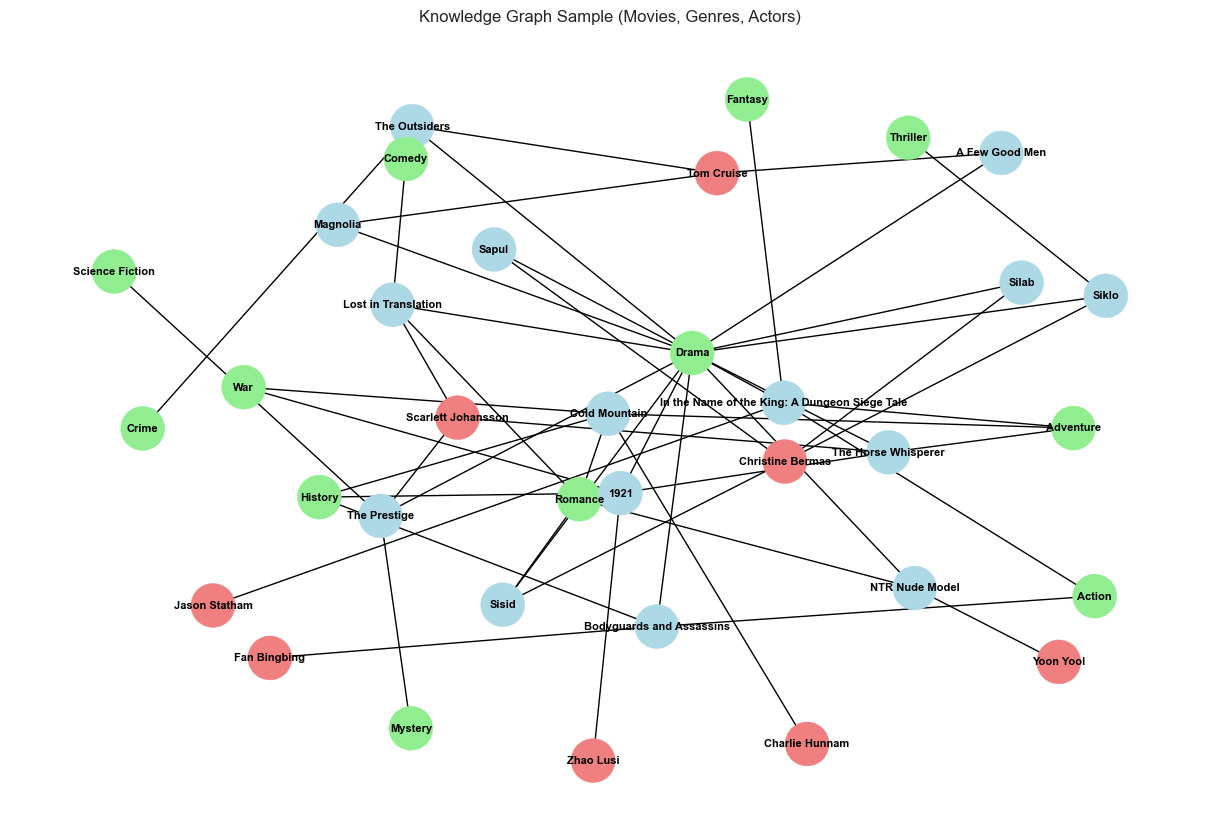

🎨 Graph visualization complete!


In [4]:
# Visualize a sample of the graph
try:
    visualize_graph_sample(neo4j_uri, neo4j_user, neo4j_password, limit=15)
    print("🎨 Graph visualization complete!")
except Exception as e:
    print(f"❌ Error visualizing graph: {e}")


## 4. Regular RAG Implementation


In [5]:
# Initialize RAG system
openai_api_key = os.getenv('OPENAI_API_KEY')
if not openai_api_key:
    print("❌ Please set OPENAI_API_KEY in your .env file")
    print("Get your API key from: https://platform.openai.com/api-keys")
else:
    print("✅ OpenAI API key found")
    
    if 'df' in locals():
        # Initialize RAG
        rag = SimpleRAG(openai_api_key)
        rag.add_documents(df)
        print("✅ RAG system initialized with vector embeddings")
        
        # Test search
        test_query = "action movies with great actors"
        search_results = rag.search(test_query, top_k=3)
        
        print(f"\n🔍 Search results for '{test_query}':")
        for i, result in enumerate(search_results, 1):
            print(f"{i}. {result['document']['movie_title']} (similarity: {result['similarity']:.3f})")
    else:
        print("❌ No data available for RAG")


✅ OpenAI API key found


Downloading:   0%|          | 0.00/45.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.3M [00:00<?, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Building vector embeddings for RAG...
✅ RAG system initialized with vector embeddings

🔍 Search results for 'action movies with great actors':
1. A Few Good Men (similarity: 0.542)
2. Scoop (similarity: 0.480)
3. Léon: The Professional (similarity: 0.478)


## 5. GraphRAG Implementation


In [6]:
# Initialize GraphRAG system
if 'openai_api_key' in locals() and openai_api_key:
    try:
        graphrag = GraphRAG(neo4j_uri, neo4j_user, neo4j_password, openai_api_key)
        print("✅ GraphRAG system initialized")
        
        # Test graph context extraction
        test_query = "action movies with great actors"
        context = graphrag.extract_subgraph_context(test_query)
        
        print(f"\n🕸️ Graph context for '{test_query}':")
        print(context[:500] + "..." if len(context) > 500 else context)
        
        graphrag.close()
        
    except Exception as e:
        print(f"❌ Error initializing GraphRAG: {e}")
else:
    print("❌ OpenAI API key not available")


✅ GraphRAG system initialized

🕸️ Graph context for 'action movies with great actors':

                Movie: The Dark Knight
                Overview: Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves prey to a reign of chaos unleashed by a rising criminal mastermind known to the terrified citizens of Gotham as the Joker.
                Genres: Action
      ...


## 6. Side-by-Side Comparison: RAG vs GraphRAG


In [7]:
# Compare RAG vs GraphRAG
if 'df' in locals() and 'openai_api_key' in locals() and openai_api_key:
    
    # Test queries
    test_queries = [
        "Recommend action movies with great actors",
        "I want comedy movies with good ratings",
        "Show me drama movies from talented directors"
    ]
    
    for query in test_queries:
        print(f"\n{'='*80}")
        print(f"QUERY: {query}")
        print(f"{'='*80}")
        
        try:
            results = compare_rag_vs_graphrag(
                query, df, neo4j_uri, neo4j_user, neo4j_password, openai_api_key
            )
        except Exception as e:
            print(f"❌ Error in comparison: {e}")
            continue
        
        print("\n" + "="*80)
        
else:
    print("❌ Missing data or API key for comparison")



QUERY: Recommend action movies with great actors
RAG vs GraphRAG Comparison
Query: Recommend action movies with great actors

Building vector embeddings for RAG...
🔍 Regular RAG Recommendations:
----------------------------------------
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Based on your interest in action movies with great actors, here are my top 5 recommendations for you:

1. **The Dark Knight (2008)**
   - **Overview:** When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.
   - **Genres:** Action, Crime, Drama
   - **Cast:** Christian Bale, Heath Ledger, Aaron Eckhart,

## 7. Analysis and Summary

### Key Differences Between RAG and GraphRAG:

| Aspect | Regular RAG | GraphRAG |
|--------|-------------|----------|
| **Data Structure** | Flat text documents | Graph with relationships |
| **Search Method** | Vector similarity | Graph traversal |
| **Context** | Text-based | Relationship-based |
| **Reasoning** | Surface-level similarity | Deep relationship analysis |
| **Scalability** | Good for large text | Better for complex relationships |

### What We Demonstrated:
1. **Data Collection**: Fetched real movie data from TMDB API
2. **Knowledge Graph**: Built a Neo4j graph with movies, actors, directors, and genres
3. **Regular RAG**: Used vector embeddings for similarity search
4. **GraphRAG**: Used graph traversal and relationships for recommendations
5. **Comparison**: Showed how GraphRAG provides more contextual recommendations

### Next Steps:
- Add more complex graph queries
- Implement multi-hop reasoning
- Scale to larger datasets
- Add user preferences and feedback
